# Pandas 

*  本周主要内容：数据重塑与数据透视表（Resheap）**系统说明和实践**
*  上周主要内容：(1)新增变量丶(2)重塑丶(3)聚合的**初步和介绍实践**
*  20春_Web数据分析_week04
*  电子讲义设计者：廖汉腾, 许智超
<br/>
<br/>


![20春_pandas_week05_Pandas_resheap](20春_pandas_CheatSheet.svg#full)


##  介绍

### 上周主要内容：
1. 新增变量
  * 用str字符串方法處理文本數據
2. 重塑
  * drop, split, stack
3. 聚合
  * merge

### 本周主要内容：
以***独角兽数据***案例进行数据框数据重塑与数据透视表**系统说明和实践**：
1. 重塑表格布局：
    1. 对表格行进行排序（sort_values）
    2. 长到宽表格式（pivot）
3. 数据透视表




### 本电子讲义说明

本电子讲义为一系列课程的主要教材
*  课程：20春_数据分析pandas （中山大学南方学院）
*  设计者：廖汉腾, 许智超
* 参考来源: [官方英文新手教程](https://pandas.pydata.org/pandas-docs/version/1.0.2/getting_started/index.html#getting-started)

-----

课堂教学方式：
* 分段式以英文新手教程的内容做示范及说明
* 课堂上以实际中文数据做操练，每段约10-15分钟
* 抽学生联mic自播说明难点及成果点，教师总结

-----

课后实践方式：
* 学生fork教师提供的代码，做以下实践
* (必做)一项为此代码的实践，学生需要对ipynb文档中的说明(含markdown及图片)及代码进行演化改进，可以是注解说明，可以是调整参数实验，可以是额外方法实践，可以是以上的组合，学生
* (选做)一项为此代码的延伸实践，学生对ipynb文档中的一部分或全部进行演化，变成另一个独立项目，说好或做好一件事

In [15]:
import pandas as pd

In [2]:
%%html
<style>
/* 本电子讲义使用之CSS */
div.code_cell {
    background-color: #e5f1fe;
}
div.cell.selected {
    background-color: #effee2;
    font-size: 2rem;
    line-height: 2.4rem;
}
div.cell.selected .rendered_html table {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html pre code {
    background-color: #C4E4ff;   
    padding: 2px 25px;
}
.rendered_html pre {
    background-color: #99c9ff;
}
div.code_cell .CodeMirror {
    font-size: 2rem !important;
    line-height: 3.6rem !important;
}
.rendered_html img, .rendered_html svg {
    max-width: 60%;
    height: auto;
    float: right;
}

.rendered_html img[src*="#full"], .rendered_html svg[src*="#full"] {
    max-width: 100%;
    height: auto;
    float: none;
}

.rendered_html img[src*="#thumbnail"], .rendered_html svg[src*="#thumbnail"] {
    max-width: 15%;
    height: auto;
}

/* Gradient transparent - color - transparent */
hr {
    border: 0;
    border-bottom: 1px dashed #ccc;
}
.emoticon{
    font-size: 5rem;
    line-height: 4.4rem;
    text-align: center;
    vertical-align: middle;
}
.bg-comine {
    width: 155px;
    height: 150px;
    background: url('02_split-apply-comine_500x300.png') -290px -80px;
    float: right;
}
.bg-apply {
    width: 200px;
    height: 225px;
    background: url('02_split-apply-comine_500x300.png') -200px -30px;
    float: right;
}
.bg-split {
    width: 255px;
    height: 225px;
    background: url('02_split-apply-comine_500x300.png') -10px -30px;
    float: right;
}
.break {
                   page-break-after: right; 
                   width:700px;
                   clear:both;
}
</style>

## 本周内容介绍
数据重塑与数据透视表（Resheap）**系统说明和实践**。如何重塑表格的布局？



### 对表格进行排序（sort_values）
Series.sort_values（self，axis = 0，ascending = True，inplace = False，kind =' quicksort '，na_position ='last'，ignore_index = False ）
* Series.sort_index (By index)   
按系列索引排序。  

* DataFrame.sort_values  (By values)  
通过沿任一轴的值对DataFrame进行排序。  

* DataFrame.sort_index  (By index)  
按索引对DataFrame进行排序。  

* By indexes and values

更多排序内容请参见[basics-sorting](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-sorting)




### 长到宽的表格变化（回顾groupby）







### 数据透视表（pivot、pivot_table）
#### 数据交叉概念（crosstab）

* 将列式数据变成二维交叉形式，便于分析，叫做重塑或者透视  
![](https://pandas.pydata.org/pandas-docs/stable/_images/07_pivot.svg)

#### pivot

![](https://pandas.pydata.org/pandas-docs/stable/_images/07_pivot_table.svg)
#### pivot_table





# 数据准备

In [16]:
# A-0 简单读档并查看数据框讯息
df = pd.read_csv ("20春_pandas_week05_hurun_unicorn.tsv", encoding = "utf8", sep="\t")
df.info()
# 注意看Dtype! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   排名            494 non-null    int64 
 1   企业名称          494 non-null    object
 2   Company Name  494 non-null    object
 3   估值（亿人民币）      494 non-null    int64 
 4   国家            494 non-null    object
 5   城市            494 non-null    object
 6   行业            494 non-null    object
 7   掌门人/创始人       494 non-null    object
 8   成立年份          494 non-null    int64 
 9   部分投资机构        494 non-null    object
dtypes: int64(3), object(7)
memory usage: 38.7+ KB


# 表格排序（sorted_values）

#  长到宽的表格变化（回顾groupby）


##  统计每年的独角兽估值

In [17]:
# C-1 准备分组观察的数据
df_统计每年估值 = df[["国家","企业名称","估值（亿人民币）","成立年份"]]
df_统计每年估值

,国家,企业名称,估值（亿人民币）,成立年份
0,中国,蚂蚁金服,10000,2014
1,中国,字节跳动,5000,2012
2,中国,滴滴出行,3600,2012
3,美国,Infor,3500,2002
4,美国,JUUL Labs,3400,2015
...,...,...,...,...
489,美国,Zeta Global,70,2007
490,中国,掌门1对1,70,2014
491,中国,转转,70,2015
492,美国,Zipline International,70,2014


In [18]:
# C-2 分组计算国家估值（按年份）
df_统计每年估值_group = df.groupby(by= ["成立年份","国家"]).agg({"估值（亿人民币）":"sum"})
df_统计每年估值_group

估值（亿人民币）
成立年份 国家           
2000 中国        170
     印度        150
     德国        150
     爱尔兰       150
     美国        210
...            ...
2017 美国        870
     马耳他       150
2018 中国       1090
2019 中国        100
     美国         70

[100 rows x 1 columns]

## 思考：怎样实现数据观察？
1. 对于这样格式的数据，我想查看按年份，不同的国家的估值趋势，是无法实现的
2. 需要将数据换成每个国家是一列才可以实现

## 使用unstack实现数据二维透视

* 目的：想要画图对比按照不同年份的不同估值的数量趋势

In [19]:
# C-3 unstack 将index 变成column
df_stack = df_统计每年估值_group.unstack()
df_stack

估值（亿人民币）                                                                 \
国家         中国    以色列   卢森堡      印度  印度尼西亚  哥伦比亚     巴西     德国     新加坡     日本   
成立年份                                                                           
2000    170.0    NaN   NaN   150.0    NaN   NaN    NaN  150.0     NaN    NaN   
2001    170.0    NaN   NaN     NaN    NaN   NaN    NaN    NaN     NaN    NaN   
2002    200.0  150.0   NaN     NaN    NaN   NaN    NaN    NaN     NaN    NaN   
2003    200.0    NaN   NaN     NaN    NaN   NaN    NaN    NaN     NaN    NaN   
2004    100.0    NaN   NaN   150.0    NaN   NaN    NaN    NaN     NaN    NaN   
2005    300.0    NaN   NaN     NaN    NaN   NaN    NaN    NaN     NaN    NaN   
2006   2380.0    NaN   NaN     NaN    NaN   NaN    NaN    NaN     NaN    NaN   
2007   1280.0    NaN   NaN    70.0    NaN   NaN    NaN    NaN     NaN    NaN   
2008    710.0    NaN   NaN   840.0    NaN   NaN    NaN    NaN     NaN    NaN   
2009    950.0    NaN   NaN     NaN  500.0   NaN    NaN   70.0     NaN    NaN   
2010   1590.0  210.0   NaN  1300.0  700.0   NaN    NaN    NaN     NaN    NaN   
2011   6570.0  150.0   NaN   440.0   70.0   NaN   70.0  150.0     NaN    NaN   
2012  11330.0  150.0   NaN   140.0  300.0   NaN   70.0  370.0  1350.0    NaN   
2013   5340.0   70.0   NaN   350.0    NaN   NaN  370.0  200.0     NaN    NaN   
2014  16150.0    NaN  70.0   270.0    NaN   NaN    NaN   70.0     NaN  220.0   
2015   3960.0    NaN   NaN     NaN    NaN   NaN    NaN    NaN     NaN    NaN   
2016   1300.0    NaN   NaN    70.0    NaN  70.0    NaN    NaN     NaN    NaN   
2017    810.0    NaN   NaN    70.0    NaN   NaN    NaN    NaN     NaN    NaN   
2018   1090.0    NaN   NaN     NaN    NaN   NaN    NaN    NaN     NaN    NaN   
2019    100.0    NaN   NaN     NaN    NaN   NaN    NaN    NaN     NaN    NaN   

      ...                                                                     
国家    ...     瑞典     瑞士      美国    芬兰     英国   菲律宾   西班牙   阿根廷     韩国    马耳他  
成立年份  ...                                                                     
2000  ...    NaN    NaN   210.0   NaN    NaN   NaN   NaN   NaN    NaN    NaN  
2001  ...    NaN    NaN   210.0   NaN    NaN   NaN   NaN   NaN    NaN    NaN  
2002  ...    NaN    NaN  6270.0   NaN    NaN   NaN   NaN   NaN    NaN    NaN  
2003  ...    NaN    NaN   420.0   NaN    NaN   NaN   NaN   NaN    NaN    NaN  
2004  ...    NaN    NaN  1550.0   NaN  350.0   NaN   NaN   NaN    NaN    NaN  
2005  ...  300.0    NaN   840.0   NaN  150.0   NaN   NaN   NaN   70.0    NaN  
2006  ...    NaN    NaN   810.0   NaN    NaN   NaN   NaN   NaN    NaN    NaN  
2007  ...    NaN    NaN  2650.0   NaN    NaN   NaN   NaN   NaN  350.0    NaN  
2008  ...    NaN    NaN  4570.0   NaN    NaN   NaN   NaN   NaN    NaN    NaN  
2009  ...    NaN    NaN  2090.0   NaN   70.0   NaN   NaN   NaN    NaN    NaN  
2010  ...    NaN    NaN  6150.0   NaN    NaN   NaN   NaN   NaN  670.0    NaN  
2011  ...    NaN    NaN  2620.0   NaN  550.0   NaN  70.0   NaN  270.0    NaN  
2012  ...    NaN   70.0  4670.0   NaN  450.0   NaN   NaN   NaN    NaN    NaN  
2013  ...    NaN    NaN  3840.0   NaN  350.0   NaN   NaN  70.0    NaN    NaN  
2014  ...    NaN  500.0  2220.0   NaN    NaN   NaN   NaN   NaN    NaN    NaN  
2015  ...    NaN  150.0  5980.0   NaN  350.0  70.0   NaN   NaN    NaN    NaN  
2016  ...  150.0    NaN  1690.0  70.0  150.0   NaN   NaN   NaN    NaN    NaN  
2017  ...    NaN    NaN   870.0   NaN    NaN   NaN   NaN   NaN    NaN  150.0  
2018  ...    NaN    NaN     NaN   NaN    NaN   NaN   NaN   NaN    NaN    NaN  
2019  ...    NaN    NaN    70.0   NaN    NaN   NaN   NaN   NaN    NaN    NaN  

[20 rows x 24 columns]

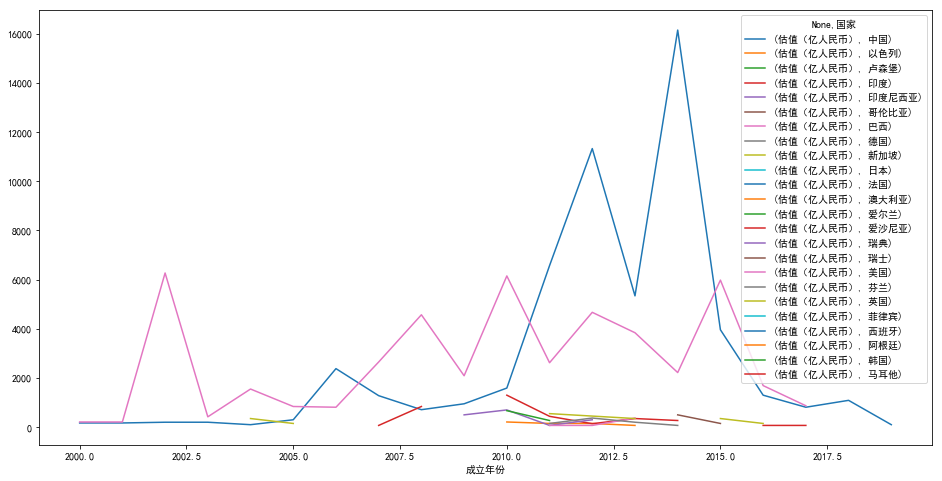

In [20]:

df_stack.plot(figsize=(16,8))

## 练习：按照年份，将不同行业的估值趋势进行描述

In [21]:
# C-4 stack将column变成index 
# stack 和 unstack 操作 与 反向操作 
df_stack.stack()

估值（亿人民币）
成立年份 国家           
2000 中国      170.0
     印度      150.0
     德国      150.0
     爱尔兰     150.0
     美国      210.0
...            ...
2017 美国      870.0
     马耳他     150.0
2018 中国     1090.0
2019 中国      100.0
     美国       70.0

[100 rows x 1 columns]

# 数据透视表（pivot、pivot_table）



## reset_index

* #D-1 reset_index 进行默认索引，取消groupby分组,将组别变成普通的列

In [22]:
df_统计每年估值_group

估值（亿人民币）
成立年份 国家           
2000 中国        170
     印度        150
     德国        150
     爱尔兰       150
     美国        210
...            ...
2017 美国        870
     马耳他       150
2018 中国       1090
2019 中国        100
     美国         70

[100 rows x 1 columns]

In [23]:
# D-1 reset_index 进行默认索引，取消groupby分组,将组别变成普通的列
df_统计每年估值_reset = df_统计每年估值_group.reset_index()
df_统计每年估值_reset

,成立年份,国家,估值（亿人民币）
0,2000,中国,170
1,2000,印度,150
2,2000,德国,150
3,2000,爱尔兰,150
4,2000,美国,210
...,...,...,...
95,2017,美国,870
96,2017,马耳他,150
97,2018,中国,1090
98,2019,中国,100


## pivot 

* pivot相当于对df使用进行set_index创建分层索引，然后调用unstack

In [24]:
# D-2 pivot(index="",columns="",values="")
df_统计每年估值_pivot = df_统计每年估值_reset.pivot("成立年份","国家","估值（亿人民币）")
df_统计每年估值_pivot

国家,中国,以色列,卢森堡,印度,印度尼西亚,哥伦比亚,巴西,德国,新加坡,日本,...,瑞典,瑞士,美国,芬兰,英国,菲律宾,西班牙,阿根廷,韩国,马耳他
成立年份,,,,,,,,,,,,,,,,,,,,,
2000,170.0,NaN,NaN,150.0,NaN,NaN,NaN,150.0,NaN,NaN,...,NaN,NaN,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,200.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,100.0,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1550.0,NaN,350.0,NaN,NaN,NaN,NaN,NaN
2005,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,840.0,NaN,150.0,NaN,NaN,NaN,70.0,NaN
2006,2380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1280.0,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2650.0,NaN,NaN,NaN,NaN,NaN,350.0,NaN
2008,710.0,NaN,NaN,840.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
attr = df_统计每年估值_pivot.columns.to_list()

In [71]:
from pyecharts import options as opts
from pyecharts.charts import Pie, Timeline
from pyecharts.faker import Faker


tl = Timeline()
for i in range(2000, 2020):
    pie = (
        Pie()
        .add(
            "商家A",
            [list(z) for z in zip(attr, df_统计每年估值_pivot.loc[i].to_list())],
            rosetype="radius",
            radius=["30%", "55%"],
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="{}年全球各个国家独角兽估值".format(i)),
                        legend_opts=opts.LegendOpts(pos_top="5%"),)
    )
    tl.add(pie, "{}年".format(i))
# tl.render("timeline_pie.html")
tl.render_notebook()

In [25]:
# 如果没有安装，使用pip install pyecharts安装
from pyecharts.charts import Line
from pyecharts import options as opts

In [26]:
# 折线图
line = Line()

# x轴
line.add_xaxis(df_统计每年估值_pivot.index.to_list())

# 每个y轴
line.add_yaxis("中国", df_统计每年估值_pivot["中国"].round(2).to_list())
# line.add_yaxis("美国", df_统计每年估值_pivot["美国"].round(2).to_list())
# line.add_yaxis("最高价", df_统计每年估值_pivot["high"].round(2).to_list())
# 图表配置
line.set_global_opts(
    title_opts=opts.TitleOpts(title="百度股票2019年"),
    tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
)

In [27]:
# 渲染数据
line.render_notebook()

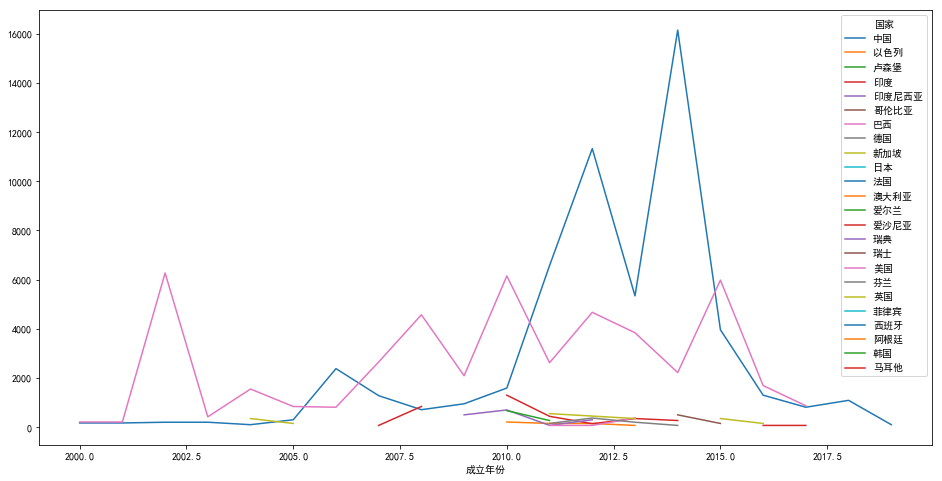

In [12]:
df_统计每年估值_pivot.plot(figsize=(16,8))

## pivot_table
* pivot_table 比pivot 多function运算
* 这样相当于groupby+agg+pivot 的结果可用更好的pivot_table

In [ ]:
df_统计每年估值_pivot_table = df_统计每年估值.pivot_table(index="成立年份",columns="国家",values="估值（亿人民币）",aggfunc=sum)

In [62]:
df_统计每年估值_pivot_table

国家,中国,以色列,卢森堡,印度,印度尼西亚,哥伦比亚,巴西,德国,新加坡,日本,...,瑞典,瑞士,美国,芬兰,英国,菲律宾,西班牙,阿根廷,韩国,马耳他
成立年份,,,,,,,,,,,,,,,,,,,,,
2000,170.0,NaN,NaN,150.0,NaN,NaN,NaN,150.0,NaN,NaN,...,NaN,NaN,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,200.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,100.0,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1550.0,NaN,350.0,NaN,NaN,NaN,NaN,NaN
2005,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,840.0,NaN,150.0,NaN,NaN,NaN,70.0,NaN
2006,2380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1280.0,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2650.0,NaN,NaN,NaN,NaN,NaN,350.0,NaN
2008,710.0,NaN,NaN,840.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
